# Project Domain- Vehicle

# Dataset Description
The features were extracted from the silhouettes by the HIPS (Hierarchical Image Processing System) extension BINATTS, which extracts a combination of scale independent features utilising both classical moments based measures such as scaled variance, skewness and kurtosis about the major/minor axes and heuristic measures such as hollows, circularity, rectangularity and compactness.

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

# Objective:

### Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.

# Index

- 1.[Libraries](#section_L)
- 2.[Importing Dataset](#section_ID)
- 3.[Data Preprocessing](#section_DP)
- 4.[Understanding the Attributes](#section_UA)
- 5.[Feature Selection](#section_FS)
- 6.[Splitting data into train-test](#section_SD)
- 7.[K-Fold cross validation](#section_KF)
- 8.[PCA Analysis](#section_PCA)
- i.[Splitting Principal Component data into train-test](#section_PSD)
- ii.[K-Fold cross validation with Principal Components](#section_PKF)

# Libraries<a id="section_L"></a>

In [1]:
#For numerical libraries
import numpy as np 
#To handle data in the form of rows and columns
import pandas as pd      
import os
import re
#importing ploting libraries
import matplotlib.pyplot as plt
#importing the Encoding library
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
#importing seaborn for statistical plots
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score

# Importing Dataset<a id="section_ID"></a>

In [2]:
# current directory
cpath = os.getcwd()
print(f"Current Working Directory  :  \n{cpath}\n")

Current Working Directory  :  
C:\Users\MadhurimaPau_bhbpoof\Downloads\Use_case_4



In [3]:
# to fetch the list of subdirectories in the current working directory
directory_contents = os.listdir(cpath)
print(directory_contents)

['.ipynb_checkpoints', 'Use_case.ipynb', 'vehicle.csv']


In [4]:
for item in directory_contents:
        if bool(re.search("csv",item)):
            print(item)

vehicle.csv


In [5]:
# sub dir path where the pdfs raw data is saved 
path_DE = cpath+"\\"+item
print(f"Path in which the csv file is stored :\n{path_DE}\n")

Path in which the csv file is stored :
C:\Users\MadhurimaPau_bhbpoof\Downloads\Use_case_4\vehicle.csv



In [6]:
# Read the csv file 
vehicle_csv = pd.read_csv(path_DE)
vehicle_csv.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [7]:
#Shape of the dataset
print(vehicle_csv.shape)

(846, 19)


The dataset has 846 observations/samples.
- It shows that there are 18 independent variables (compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio) and one dependent variable (class).
- Only the class variable is non numeric others are numeric.

# Data Preprocessing<a id="section_DP"></a>

In [8]:
#Displaying the columns

vehicle_csv.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [9]:
#Data type of the attributes

vehicle_csv.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [10]:
#Five point summary of the dataset

vehicle_csv.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

The first preprocessing step is to divide the dataset into a feature set and corresponding labels.

In [11]:
vehicle_csv.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### Handling the Missing values

- As some data are rightly skewed so we will use median to handle the missing values.

In [12]:
#Replacing the missing values by median 
for i in vehicle_csv.columns[:17]:
    median_value = vehicle_csv[i].median()
    vehicle_csv[i] = vehicle_csv[i].fillna(median_value)

In [13]:
# again check for missing values
vehicle_csv.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [14]:
vehicle_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

# Understanding the attributes<a id="section_UA"></a>

## Dependent Attribute

### class

In [15]:
print('Class: \n', vehicle_csv['class'].unique())

Class: 
 ['van' 'car' 'bus']


In [16]:
vehicle_csv['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

### Univariate Analysis

C:\Users\MadhurimaPau_bhbpoof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

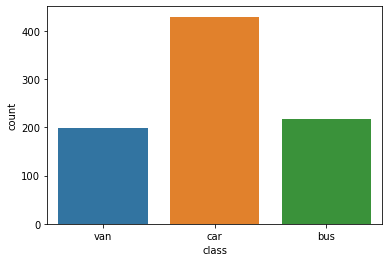

In [17]:
sns.countplot(vehicle_csv['class'])

### Encode the dependent attribute

In [18]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
vehicle_csv['class']= label_encoder.fit_transform(vehicle_csv['class'])
 
vehicle_csv['class'].unique()

array([2, 1, 0])

In [19]:
vehicle_csv.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

## Independent Attributes

### Multivariate Analysis

In [20]:
X = vehicle_csv.iloc[:,0:len(vehicle_csv.columns)-1]  #independent columns
y = vehicle_csv.iloc[:,-1] 

In [21]:
X.shape

(846, 18)

In [22]:
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [23]:
y.shape

(846,)

In [24]:
y.head()

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int32

In [25]:
X.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [26]:
y.isnull().sum()

0

<AxesSubplot:>

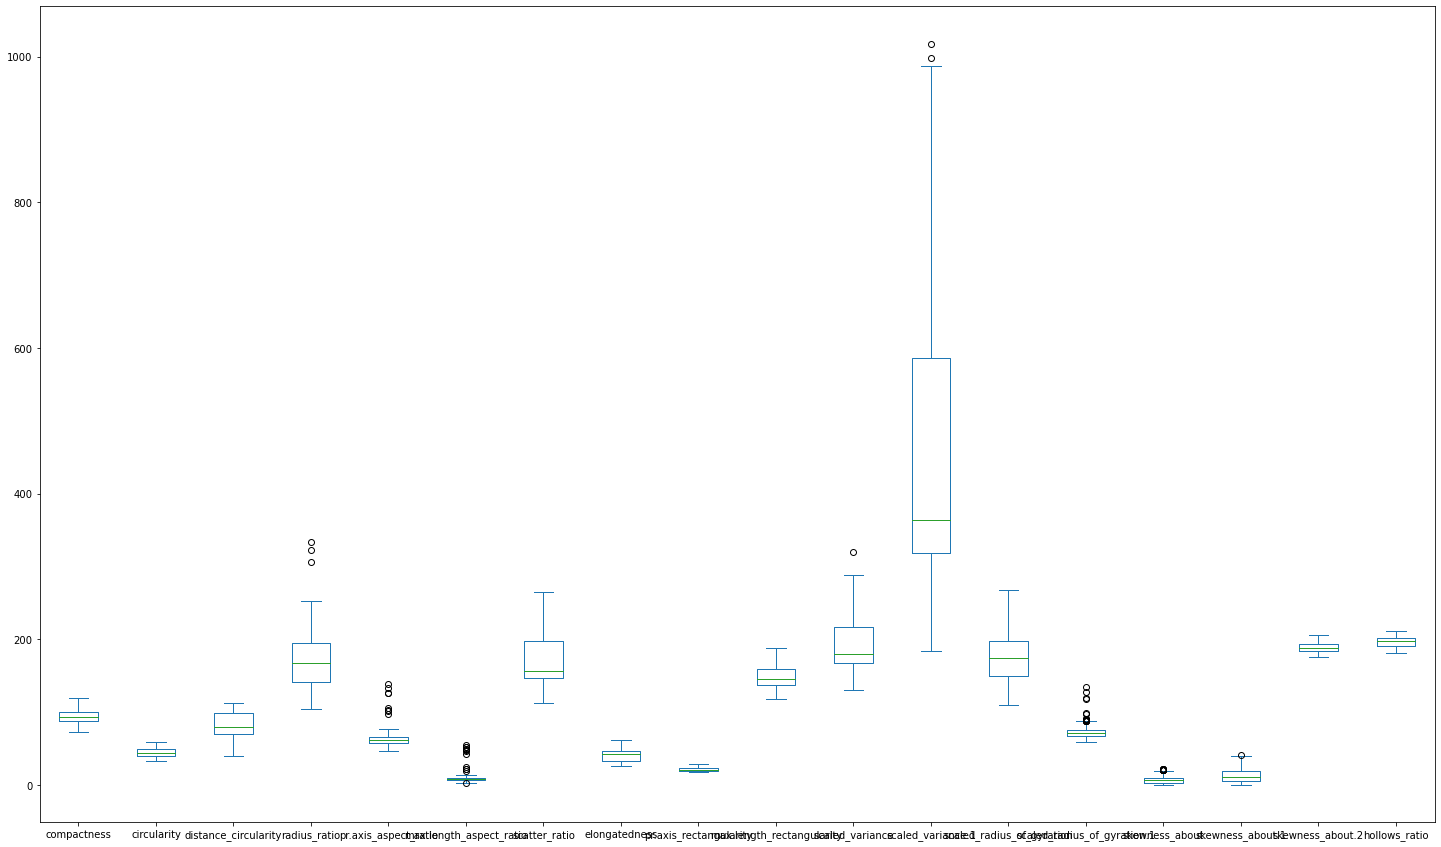

In [27]:
#Boxplot to understand spread and outliers
X.plot(kind='box', figsize=(25,15))

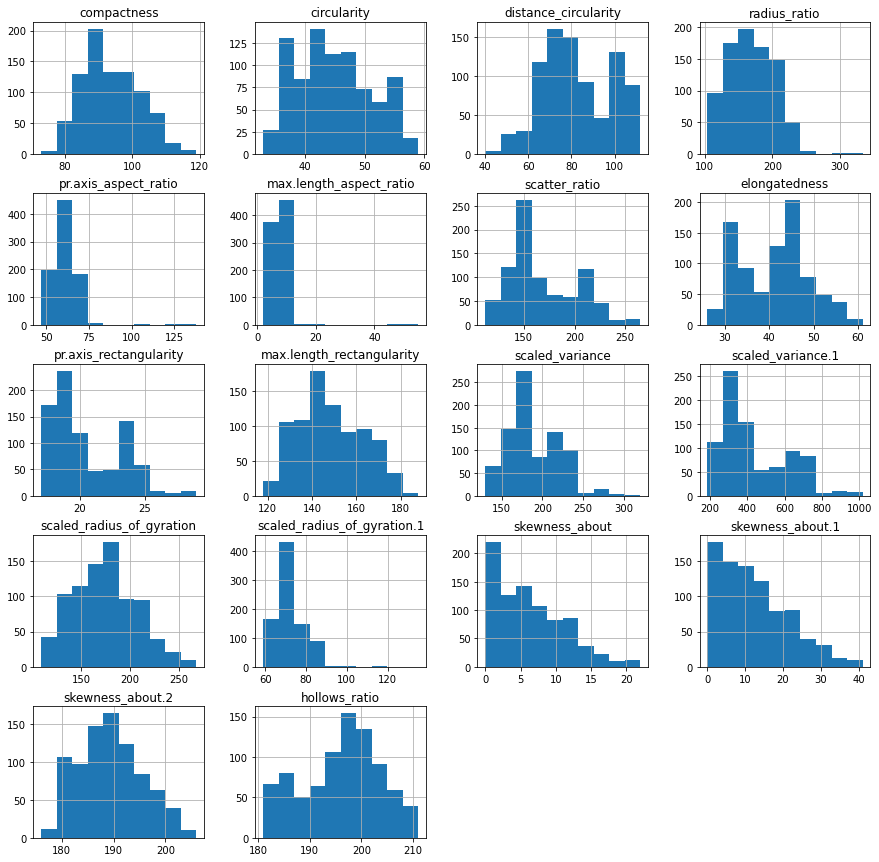

In [28]:
X.hist(figsize=(15,15))
plt.show()

In [29]:
#Identify outliers and replace them by median
for col_name in X.columns[:-1]:
    q1 = X[col_name].quantile(0.25)
    q3 = X[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    X.loc[(X[col_name] < low) | (X[col_name] > high), col_name] = X[col_name].median()

<AxesSubplot:>

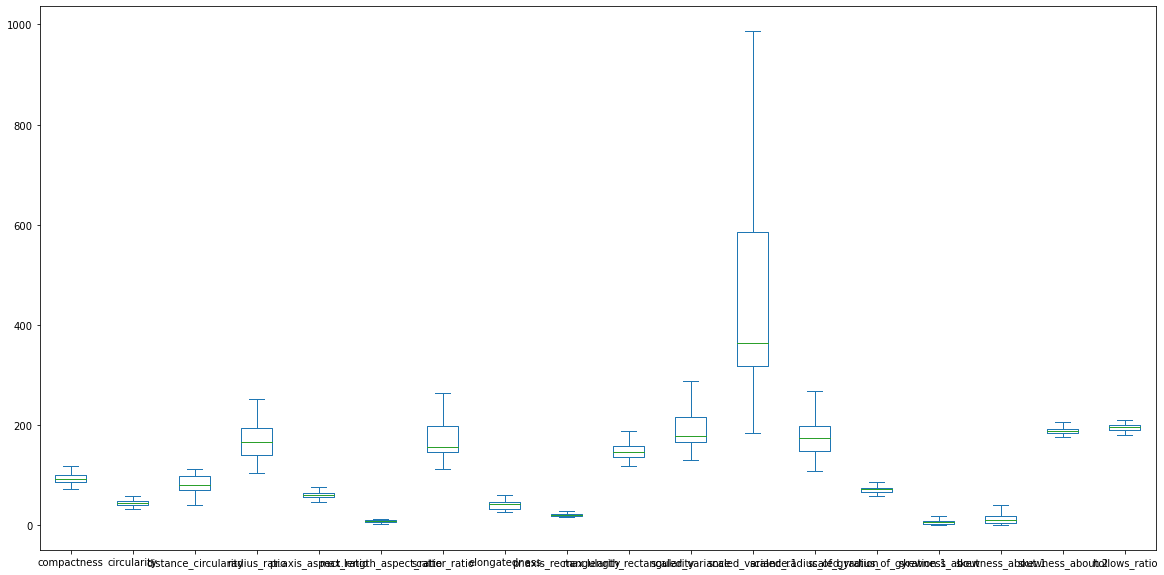

In [30]:
X.plot(kind='box', figsize=(20,10))


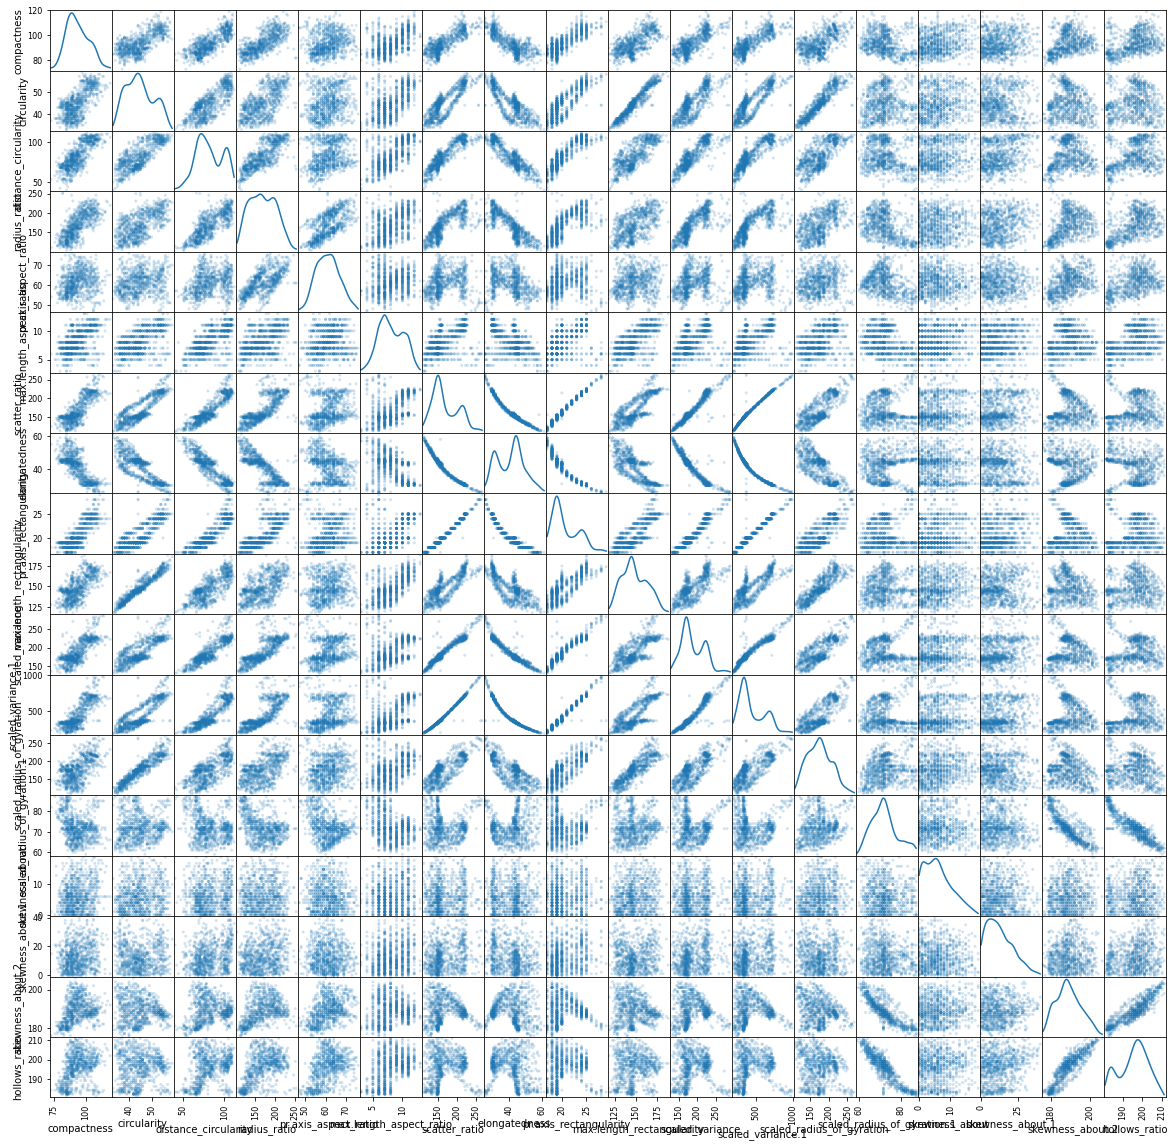

In [31]:
scatter_matrix(X, alpha=0.2, figsize=(20, 20),diagonal='kde')
plt.show()

# Feature Selection<a id="section_FS"></a>

## Correlation matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [32]:
#Create and view the correlation matrix
vehicle_csv.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   
class                           -0.182186             -0.098178   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                            

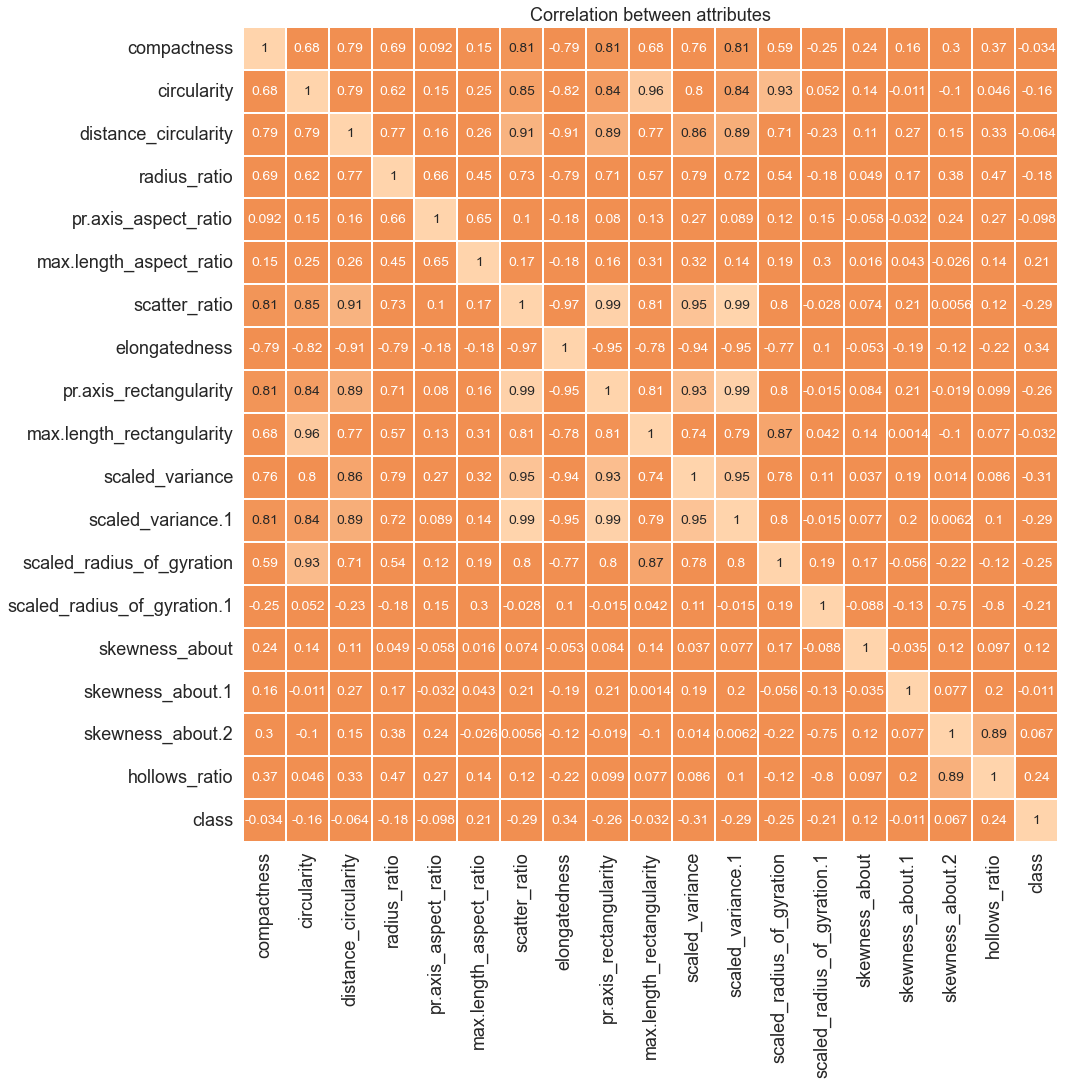

In [33]:
# correlation plot---heatmap
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(vehicle_csv.corr(),vmin=0.8, annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=18)


### There are several variables that are highly correlated with each other
- It shows that there are some attributes which are highly correlated as there corelation value is very high.
- For example: compactness is highly correlated in a positive way with scatter_ratio, pr.axis_rectangularity, scaled_variance1, distance_circularity, scaled_variance, radius_ratio. compactness is highly correlated in a negative way with elongatedness.

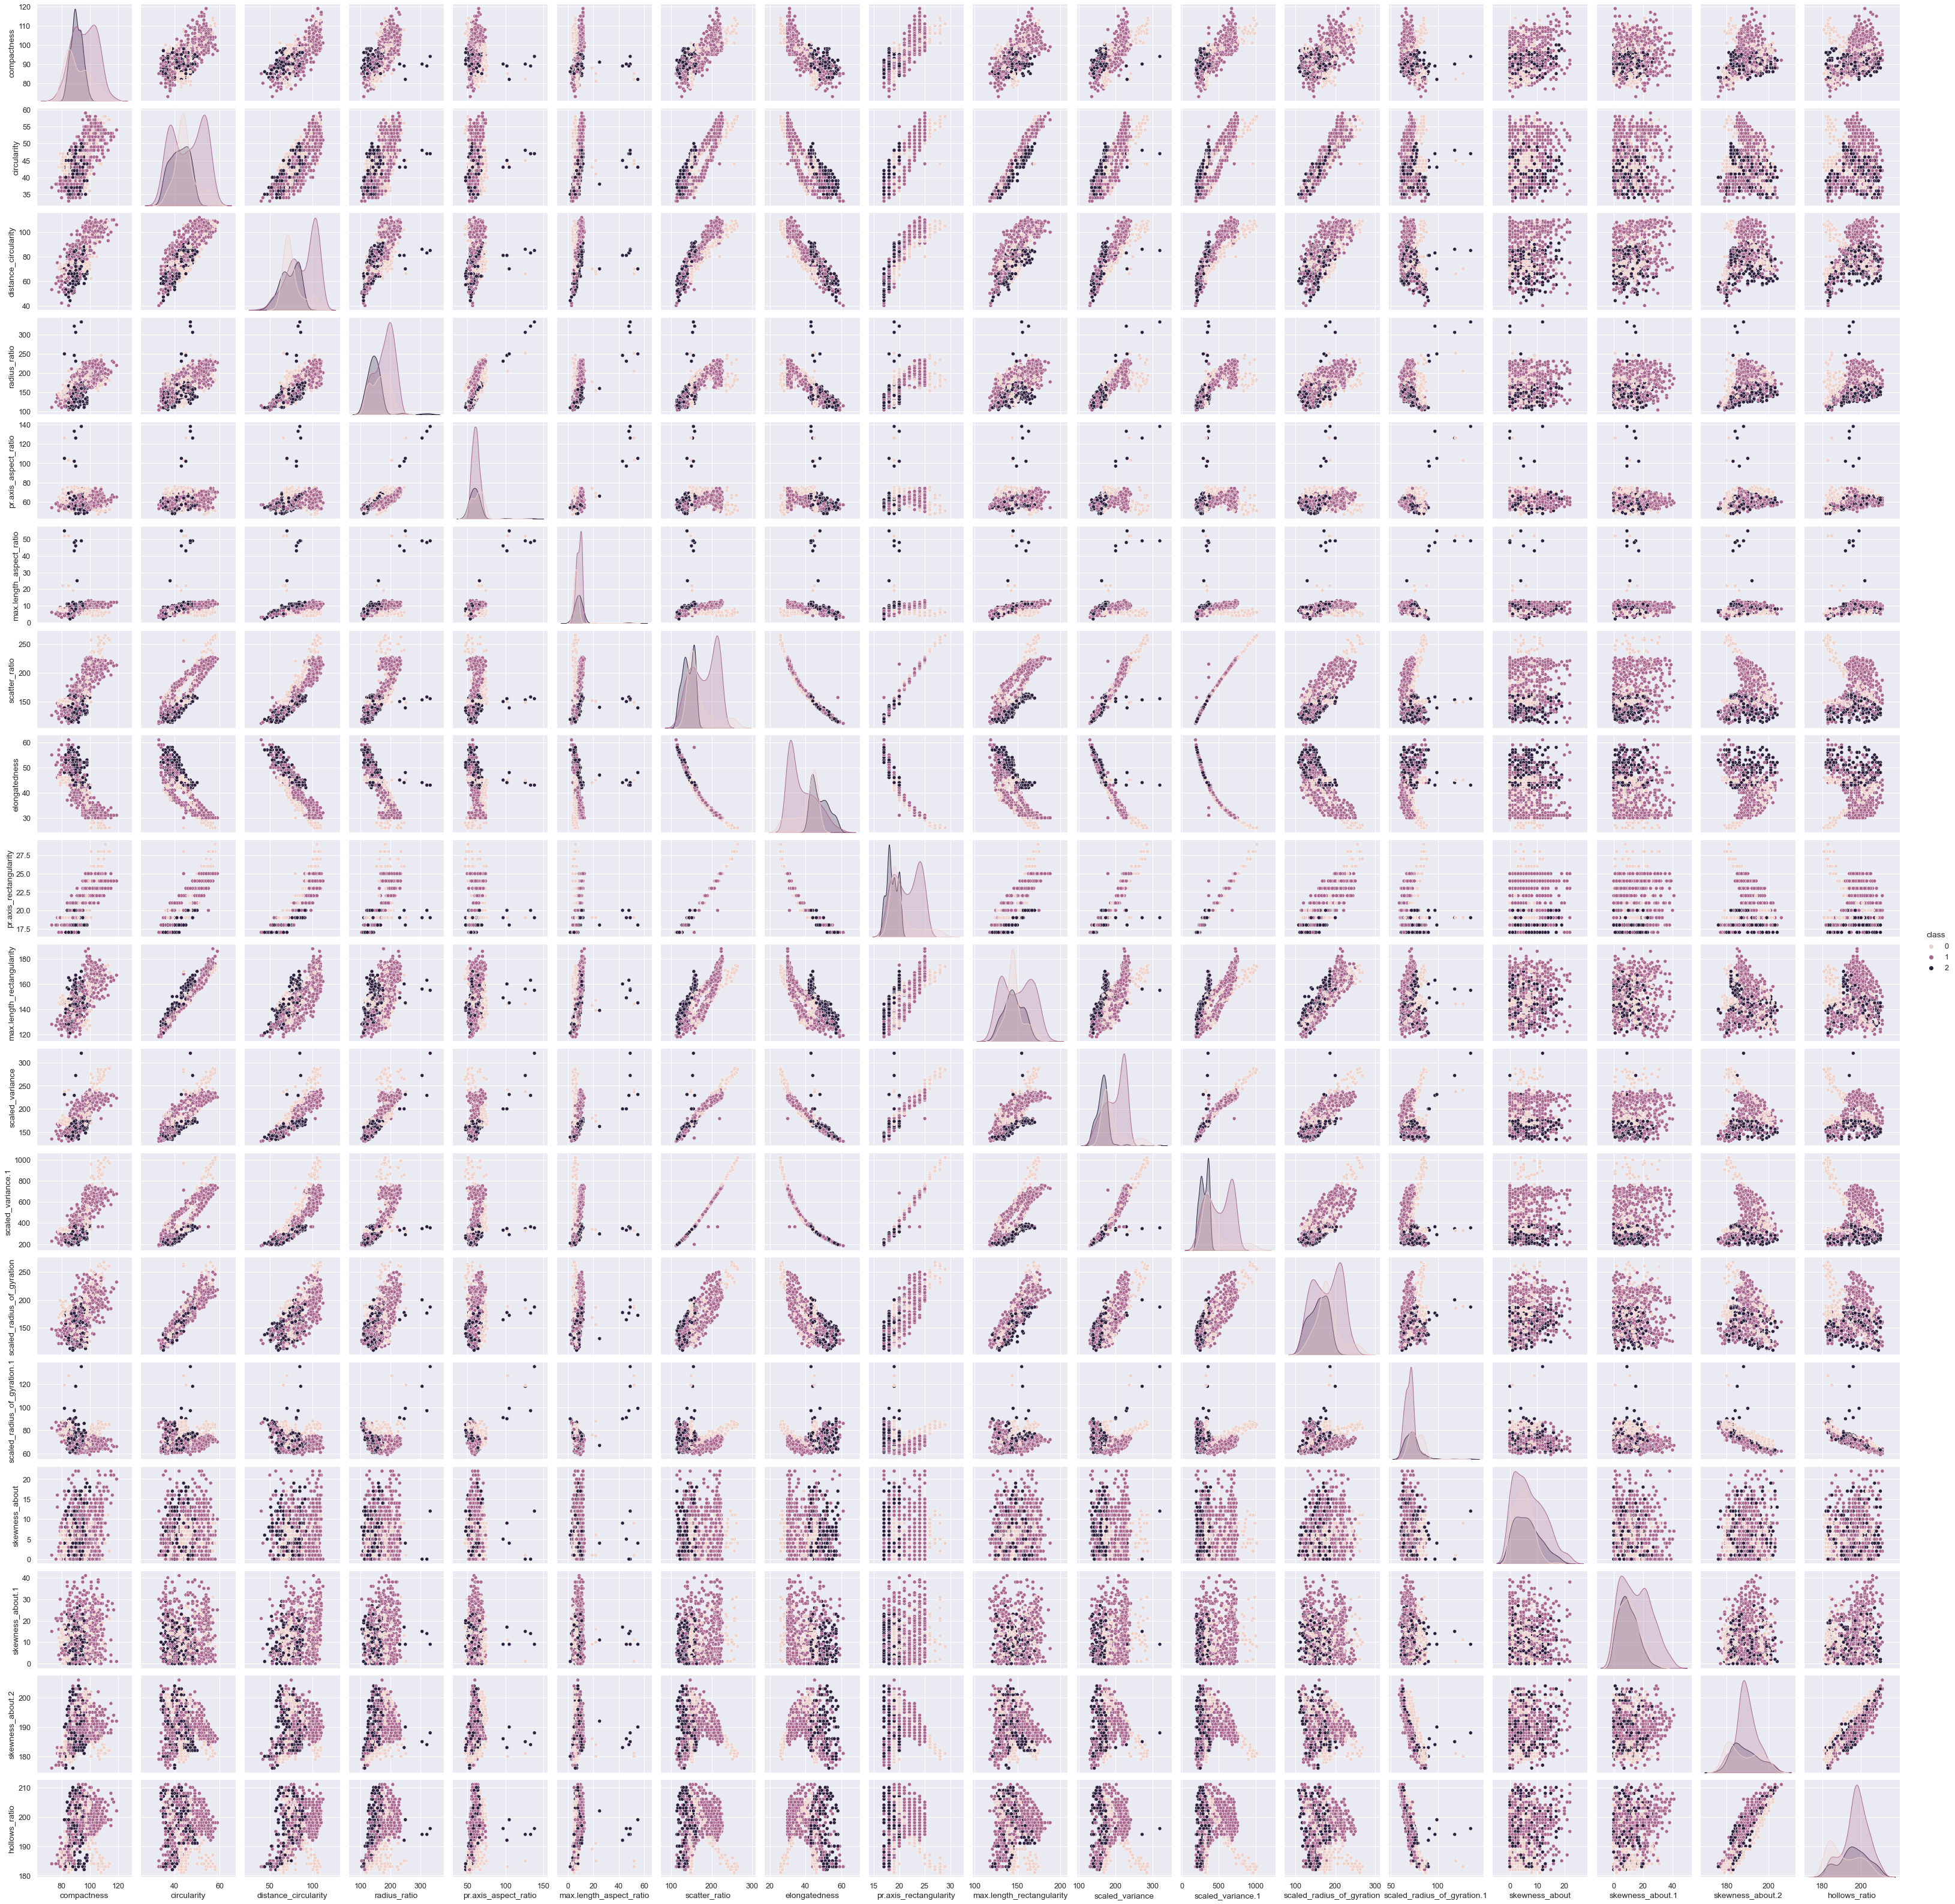

In [34]:
#pair panel
sns.pairplot(vehicle_csv,hue='class')

- It is also showing the same information as correlation matrix.
- compactness has positive linear relationship with circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance1, scaled_variance. compactness has negative linear relationship with elongatedness.
- circularity has positive linear relationship with distance_circularity, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. circularity has negative linear relationship with elongatedness.
- distance_circularity has positive linear relationship with radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. distance_circularity has negative linear relationship with elongatedness.
- radius_ratio has positive linear relationship with pr.axis_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance1, scaled_radius_of_gyration. radius_ratio has negative linear relationship with elongatedness.

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

In [35]:
#apply SelectKBest class to extract best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [36]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [37]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']  #naming the dataframe columns

In [38]:
featureScores

Attributes         Score
0                   compactness     59.506366
1                   circularity     47.685079
2          distance_circularity    502.862301
3                  radius_ratio   1031.464380
4          pr.axis_aspect_ratio     19.292819
5       max.length_aspect_ratio    105.409807
6                 scatter_ratio   1255.573812
7                 elongatedness    326.040858
8        pr.axis_rectangularity     56.522606
9     max.length_rectangularity     24.425818
10              scaled_variance    888.439974
11            scaled_variance.1  12651.196077
12    scaled_radius_of_gyration    454.017832
13  scaled_radius_of_gyration.1     81.965787
14               skewness_about     86.418303
15             skewness_about.1    444.111534
16             skewness_about.2      2.106312
17                hollows_ratio     29.277924

In [39]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Attributes         Score
11          scaled_variance.1  12651.196077
6               scatter_ratio   1255.573812
3                radius_ratio   1031.464380
10            scaled_variance    888.439974
2        distance_circularity    502.862301
12  scaled_radius_of_gyration    454.017832
15           skewness_about.1    444.111534
7               elongatedness    326.040858
5     max.length_aspect_ratio    105.409807
14             skewness_about     86.418303


## Feature Importance

We can get the feature importance of each feature of our dataset by using the feature importance property of the model.

Feature importance gives us a score for each feature of our data, the higher the score more important or relevant is the feature towards our output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [40]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [41]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.03763857 0.04203135 0.06217072 0.04460911 0.06169842 0.12347784
 0.06396058 0.08343239 0.06297158 0.07017436 0.0606777  0.06772887
 0.03158861 0.05291944 0.02090932 0.02532785 0.04016507 0.04851824]


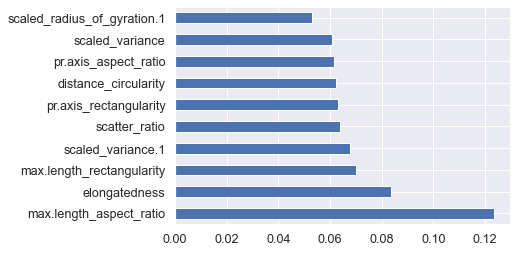

In [42]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

For training purpose I will be taking certain attributes into consideration with respect to the results from feature selection.The features are:
- scaled_variance.1
- scatter_ratio
- radius_ratio
- scaled_variance
- distance_circularity
- skewness_about.1
- scaled_radius_of_gyration
- elongatedness
- skewness_about
- scaled_radius_of_gyration.1
- max.length_aspect_ratio
- pr.axis_rectangularity
- max.length_rectangularity
- pr.axis_aspect_ratio

In [43]:
Xe = vehicle_csv[['scaled_variance.1','scatter_ratio','radius_ratio','scaled_variance','distance_circularity','skewness_about.1','scaled_radius_of_gyration','elongatedness','skewness_about','scaled_radius_of_gyration.1','max.length_aspect_ratio','pr.axis_rectangularity','max.length_rectangularity','pr.axis_aspect_ratio']]
Xe.head()

scaled_variance.1  scatter_ratio  radius_ratio  scaled_variance  \
0              379.0          162.0         178.0            176.0   
1              330.0          149.0         141.0            170.0   
2              635.0          207.0         209.0            223.0   
3              309.0          144.0         159.0            160.0   
4              325.0          149.0         205.0            241.0   

   distance_circularity  skewness_about.1  scaled_radius_of_gyration  \
0                  83.0              16.0                      184.0   
1                  84.0              14.0                      158.0   
2                 106.0               9.0                      220.0   
3                  82.0              10.0                      127.0   
4                  70.0              11.0                      188.0   

   elongatedness  skewness_about  scaled_radius_of_gyration.1  \
0           42.0             6.0                         70.0   
1           45.0             9.0                         72.0   
2           32.0            14.0                         73.0   
3           46.0             6.0                         63.0   
4           45.0             9.0                        127.0   

   max.length_aspect_ratio  pr.axis_rectangularity  max.length_rectangularity  \
0                       10                    20.0                        159   
1                        9                    19.0                        143   
2                       10                    23.0                        158   
3                        9                    19.0                        143   
4                       52                    19.0                        144   

   pr.axis_aspect_ratio  
0                  72.0  
1                  57.0  
2                  66.0  
3                  63.0  
4                 103.0

In [44]:
Xe.shape

(846, 14)

In [45]:
y.head()

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int32

# Without applying Dimensionality Reduction

# Split the data into train and test<a id="section_SD"></a>

In [46]:
 X_train, X_test, y_train, y_test= train_test_split(Xe, y, test_size= 0.2, random_state=0)  

## Feature Scaling

In [47]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)    

## Training a Support vector machine using the train set 

In [48]:
 # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [49]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.98      0.96      0.97        95
           2       0.89      0.97      0.93        35

    accuracy                           0.96       170
   macro avg       0.95      0.96      0.95       170
weighted avg       0.96      0.96      0.96       170



In [51]:
accuracy_score_raw = accuracy_score(y_test, y_pred)
accuracy_score_raw

0.9588235294117647

In [52]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[38,  1,  1],
       [ 1, 91,  3],
       [ 0,  1, 34]], dtype=int64)

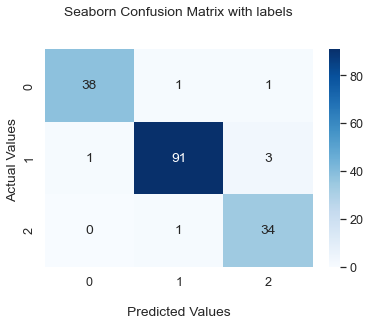

In [53]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

# Perform K-fold cross validation

In [54]:
accuracies_k_fold = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print(accuracies_k_fold.mean())
print(accuracies_k_fold.std())

0.9363476733977173
0.02586361498780234


# PCA Analysis<a id="section_PCA"></a>

In [55]:
vehicle_csv.shape

(846, 19)

In [56]:
X= vehicle_csv.iloc[:,0:len(vehicle_csv.columns)-1]  #independent columns
y = vehicle_csv.iloc[:,-1] 

In [57]:
#Obtain the shape of the feature matrix

X.shape

(846, 18)

In [58]:
y.shape

(846,)

In [59]:
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)

# Method-1

## Eigendecomposition

### We need to make the covariance matrix when we are doing eigendecomposition.

In [60]:
# Construct the covariance matrix.
import numpy as np
cov_mat = np.cov(X_scaled.T)

# From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# print the Eigenvalues
print("Raw Eigenvalues: \n", eigen_vals)
print('*'*50)
# the sum of the Eigenvalues 
print("Percentage of Variance Explained by Each Component: \n", eigen_vals/sum(eigen_vals))

Raw Eigenvalues: 
 [9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.96445743e-03 1.00257898e-02 2.74120657e-02
 1.79166314e-02 2.05792871e-02]
**************************************************
Percentage of Variance Explained by Each Component: 
 [5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.64497408e-04 5.56329946e-04 1.52109243e-03
 9.94191854e-04 1.14194232e-03]


### Because we have 18 variables in our X_scaled, we got 18 PCs.

## Sorting the eigenvalues and cumulate them.

### Sorting the eigenvalues by decreasing order to rank the eigenvectors and cumulate them to figure out how many PCs are we going to use.

In [61]:
# let's look at the cumulative variance described by each component
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.52186034, 0.68915802, 0.79478441, 0.86025901, 0.9111577 ,
       0.94112183, 0.96103549, 0.97335049, 0.98226265, 0.98735979,
       0.99104984, 0.9936357 , 0.99562195, 0.99714304, 0.99828498,
       0.99927917, 0.9998355 , 1.        ])

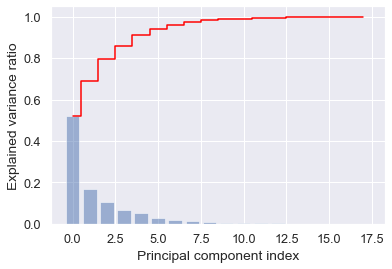

In [64]:
# make a bar plot of the variance associated with each component
import matplotlib.pyplot as plt

plt.bar(range(0,18), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(0,18), cum_var_exp, where='mid',
         label='Cumulative explained variance',
         color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()

# Method-2

### PCA using sklearn

In [65]:
pca_18 = PCA(n_components=18,random_state=0)
Xpca_18=pca_18.fit_transform(X_scaled)

### We have set n_components=18. The original number of features in our dataset is also 18. We have not reduced the dimensionality at all (we’ve just transformed the data). Therefore, the percentage of variance explained by 18 principal components should be 100%.

In [66]:
print("Variance explained by all 18 principal components=",sum(pca_18.explained_variance_ratio_*100))

Variance explained by all 18 principal components= 100.00000000000001


### The explained_variance_ratio_ attribute of the PCA() class returns a one-dimensional numpy array which contains the values of the percentage of variance explained by each of the selected components.


In [67]:
print("sklearn var:\n", pca_18.explained_variance_ratio_*100)

sklearn var:
 [5.21860337e+01 1.67297684e+01 1.05626388e+01 6.54745969e+00
 5.08986889e+00 2.99641300e+00 1.99136623e+00 1.23150069e+00
 8.91215289e-01 5.09714695e-01 3.69004485e-01 2.58586200e-01
 1.98624491e-01 1.52109243e-01 1.14194232e-01 9.94191854e-02
 5.56329946e-02 1.64497408e-02]


In [68]:
np.cumsum(pca_18.explained_variance_ratio_*100)

array([ 52.18603365,  68.9158021 ,  79.47844095,  86.02590063,
        91.11576952,  94.11218252,  96.10354875,  97.33504945,
        98.22626473,  98.73597943,  99.10498391,  99.36357011,
        99.5621946 ,  99.71430385,  99.82849808,  99.92791726,
        99.98355026, 100.        ])

Then we create the following plot.

Text(0, 0.5, 'Explained Variance')

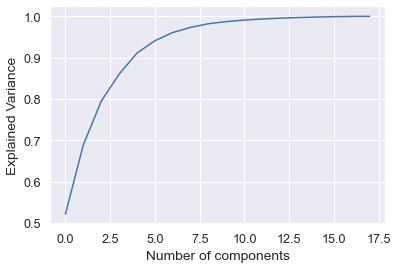

In [69]:
plt.plot(np.cumsum(pca_18.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')

In [70]:
print('Variance explained by the first principal component=',np.cumsum(pca_18.explained_variance_ratio_*100)[0])

Variance explained by the first principal component= 52.186033653007414


In [71]:
print('Variance explained by the 2 principal component=',np.cumsum(pca_18.explained_variance_ratio_*100)[1])

Variance explained by the 2 principal component= 68.9158021022674


In [72]:
print('Variance explained by the 3 principal component=',np.cumsum(pca_18.explained_variance_ratio_*100)[2])

Variance explained by the 3 principal component= 79.47844094816918


In [73]:
print('Variance explained by the 4 principal component=',np.cumsum(pca_18.explained_variance_ratio_*100)[3])

Variance explained by the 4 principal component= 86.02590063319704


In [74]:
print('Variance explained by the 5 principal component=',np.cumsum(pca_18.explained_variance_ratio_*100)[4])

Variance explained by the 5 principal component= 91.11576952449086


In [75]:
print('Variance explained by the 6 principal component=',np.cumsum(pca_18.explained_variance_ratio_*100)[5])

Variance explained by the 6 principal component= 94.11218252249516


In [76]:
print('Variance explained by the 7 principal component=',np.cumsum(pca_18.explained_variance_ratio_*100)[6])

Variance explained by the 7 principal component= 96.10354875345354


### We can see that the first 7 principal components keep about 96.10% of the variability in the dataset while reducing 11 (18–7) features in the dataset. That’s great. The remaining 11 features only contain less than 5% of the variability in data.

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
Xpca_95 = pca.fit_transform(X_scaled)
Xpca_95.shape

(846, 7)

### This means that the algorithm has found 7 principal components to preserve 95% of the variability in the data. The Xpca_95 array holds the values of all 7 principal components. We can visualize these values as in the following plot.

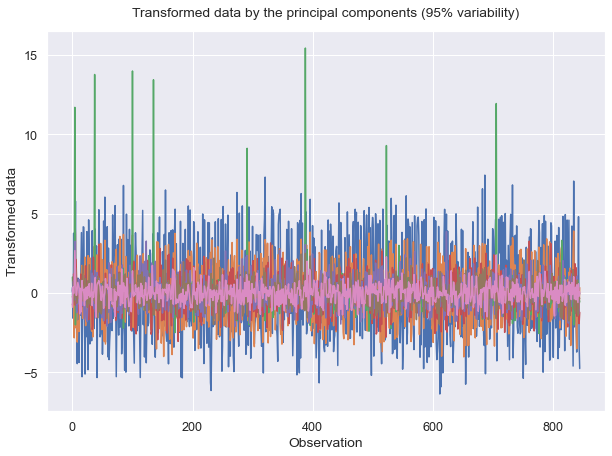

In [78]:
plt.figure(figsize=(10,7))
plt.plot(Xpca_95)
plt.xlabel('Observation')
plt.ylabel('Transformed data')
plt.title('Transformed data by the principal components (95% variability)',pad=15)
plt.show()

In [79]:
df_new = pd.DataFrame(Xpca_95,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
df_new['class']=y
df_new.head()

PC1       PC2        PC3       PC4       PC5       PC6       PC7  \
0  0.334162 -0.219026   1.001584  0.176612  0.079301 -0.757447 -0.901124   
1 -1.591711 -0.420603  -0.369034  0.233234  0.693949 -0.517162  0.378637   
2  3.769324  0.195283   0.087859  1.202212  0.731732  0.705041 -0.034584   
3 -1.738598 -2.829692   0.109456  0.376685 -0.362897 -0.484431  0.470753   
4  0.558103  4.758422  11.703647  0.147464  3.256953 -0.203446  2.671578   

   class  
0      2  
1      2  
2      1  
3      2  
4      0

In [80]:
df_new.shape

(846, 8)

When we compare with the original dataset that has 18 features, this contains only 7 features, but with 95% of the variability in data. For future reference, we can save our new dataset as an Excel or CSV file. By setting index=False, the row index labels are not saved in the files.

In [81]:
#df_new.to_csv('vehicle_95.csv',index=False)

In [82]:
Xf = df_new.iloc[:,0:len(df_new.columns)-1]  #independent columns
yt = df_new.iloc[:,-1] 

###  Analysis using Principal Components instead of the original data

In [83]:
Xf.shape

(846, 7)

In [84]:
yt.shape

(846,)

In [85]:
#Five point summary of the dataset

df_new.describe().T

count          mean       std       min       25%       50%       75%  \
PC1    846.0 -9.448707e-18  3.066692 -6.371773 -2.260724 -0.834579  2.904456   
PC2    846.0 -5.118049e-18  1.736353 -4.032626 -1.236739 -0.017740  1.173603   
PC3    846.0 -4.750600e-17  1.379683 -2.560288 -0.506294 -0.115922  0.299931   
PC4    846.0  1.496045e-17  1.086249 -3.054837 -0.660388  0.013875  0.730758   
PC5    846.0  1.334466e-17  0.957737 -2.102460 -0.683190 -0.057826  0.602054   
PC6    846.0  1.003925e-17  0.734842 -1.984993 -0.462316 -0.050956  0.448583   
PC7    846.0 -1.067901e-17  0.599058 -1.594332 -0.397643 -0.011359  0.371196   
class  846.0  9.775414e-01  0.702130  0.000000  0.000000  1.000000  1.000000   

             max  
PC1     7.430211  
PC2     4.758422  
PC3    15.441126  
PC4     3.269469  
PC5     3.873400  
PC6     2.493906  
PC7     2.671578  
class   2.000000

In [86]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     846 non-null    float64
 1   PC2     846 non-null    float64
 2   PC3     846 non-null    float64
 3   PC4     846 non-null    float64
 4   PC5     846 non-null    float64
 5   PC6     846 non-null    float64
 6   PC7     846 non-null    float64
 7   class   846 non-null    int32  
dtypes: float64(7), int32(1)
memory usage: 49.7 KB


## Split the data into train and test<a id="section_PSD"></a>

In [87]:
 Xf_train, Xf_test, yt_train, yt_test= train_test_split(Xf, yt, test_size= 0.2, random_state=0)  

### Training a Support vector machine using the train set 

In [88]:
 # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(Xf_train, yt_train) 

SVC(random_state=0)

In [89]:
#Predicting the test set result  
yt_pred= classifier.predict(Xf_test)  

In [90]:
print(classification_report(yt_test,yt_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.97      0.91      0.93        95
           2       0.82      0.94      0.88        35

    accuracy                           0.92       170
   macro avg       0.90      0.92      0.91       170
weighted avg       0.92      0.92      0.92       170



In [91]:
accuracy_score_pca = accuracy_score(yt_test, yt_pred)
accuracy_score_pca

0.9176470588235294

In [92]:
#Creating the Confusion matrix  
cmt= confusion_matrix(yt_test, yt_pred)  
cmt

array([[37,  2,  1],
       [ 3, 86,  6],
       [ 1,  1, 33]], dtype=int64)

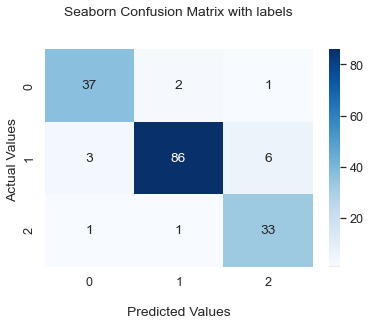

In [93]:
ax = sns.heatmap(cmt, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

## Perform K-fold cross validation <a id="section_PKF"></a>

In [94]:
accuracies_k_fold_pca = cross_val_score(estimator = classifier, X = Xf_train, y = yt_train, cv = 10)
print(accuracies_k_fold_pca.mean())
print(accuracies_k_fold_pca.std())

0.9156496927129061
0.03129850036982538


In [95]:
# Creating a dict of lists
data = {'Data':["Raw_Data", "Principal_Component_Data"],
       'Accuracy_Score':[accuracy_score_raw, accuracy_score_pca],
       'Cross-Validation_Score':[accuracies_k_fold.mean(),accuracies_k_fold_pca.mean()]}
 
# Creating a dataframe
df = pd.DataFrame(data)
 
# Using set_index() method on 'Data' column
df = df.set_index('Data')
df

Accuracy_Score  Cross-Validation_Score
Data                                                            
Raw_Data                        0.958824                0.936348
Principal_Component_Data        0.917647                0.915650